# Library

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fungsi-Fungsi

In [3]:
# fungsi histogram
def histogram(dataset):
  dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
  plt.show()

In [4]:
# fungsi heatmap
def heatmap(dataset):
  plt.figure(figsize=(20,20))
  sb.heatmap(dataset.corr(), cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
  plt.show()

In [5]:
# fungsi feature engineering
def scalling(features, label, test_size):
  # scalling
  scaler = StandardScaler()
  features = scaler.fit_transform(features.values)
  label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

  # membagi data train dan test
  feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=test_size, random_state=10)
  return feature_train, feature_test, label_train, label_test

In [6]:
# fungsi linear regression
def linreg(f_train, l_train, f_test, l_test):
  lm = LinearRegression()
  lm.fit(f_train, l_train)

  pred = lm.predict(f_test)


  mse = mean_squared_error(l_test, pred)
  mae = mean_absolute_error(l_test, pred)
  r2 = r2_score(l_test, pred)

  print('MSE \t\t: {:.3f}'.format(mse))
  print('MAE \t\t: {:.3f}'.format(mae))
  print('r2 score \t: {:.3f}'.format(r2))
  print('RMSE \t\t: {:.3f}'.format(np.sqrt(mse)))

In [7]:
# fungsi baseline model
def bl_model(f_train, l_train, f_test, l_test, n_features):
  model = Sequential()
  model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  history = model.fit(x=f_train, y=l_train, validation_data=(f_test, l_test), 
                      epochs=50, batch_size=8)
  return model, history

In [8]:
# fungsi deeper model
def deeper_model(f_train, l_train, f_test, l_test, n_features):
  model = Sequential()
  model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(x=f_train, y=l_train, validation_data=(f_test, l_test), 
                      epochs=50, batch_size=8)
  return model, history

In [9]:
# fungsi wider model
def wider_model(f_train, l_train, f_test, l_test, n_features):
  model = Sequential()
  model.add(Dense(20, input_dim=n_features, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(x=f_train, y=l_train, validation_data=(f_test, l_test), 
                      epochs=50, batch_size=8)
  return model, history

In [10]:
# fungsi hasil prediksi
def prediksi(f_test, l_test, model):
  pred = model.predict(f_test)
  pred = pred.flatten()

  mse = mean_squared_error(l_test, pred)
  mae = mean_absolute_error(l_test, pred)
  r2 = r2_score(l_test, pred)

  print('MSE \t\t: {:.3f}'.format(mse))
  print('MAE \t\t: {:.3f}'.format(mae))
  print('r2 score \t: {:.3f}'.format(r2))
  print('RMSE \t\t: {:.3f}'.format(np.sqrt(mse)))

# Dataset Auto

In [ ]:
dataset1 = pd.read_csv('/content/drive/My Drive/abc/auto.csv')

dataset1 = dataset1.drop(['symboling', 'normalized-losses', 'make', 'fuel-type', 
                          'aspiration','num-of-doors', 'body-style', 'drive-wheels', 
                          'engine-location','curb-weight', 'engine-type', 
                          'num-of-cylinders', ' engine-size', 'fuel-system',
                          'horsepower', 'city-mpg', 'highway-mpg'], axis=1)
dataset1.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


### EDA

In [ ]:
dataset1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               205 non-null    object 
 5   stroke             205 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           205 non-null    object 
 8   price              205 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


In [ ]:
dataset1 = dataset1.replace('?', np.nan)

In [ ]:
dataset1.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 4
stroke               4
compression-ratio    0
peak-rpm             2
price                4
dtype: int64

In [ ]:
col = dataset1.columns

for n in col:
  dataset1[n] = dataset1[n].astype(float)

In [ ]:
for n in col:
  dataset1[n] = dataset1[n].fillna(dataset1[n].mean())

In [ ]:
col = ['peak-rpm', 'price']

for n in col:
  dataset1[n] = dataset1[n].astype(int)

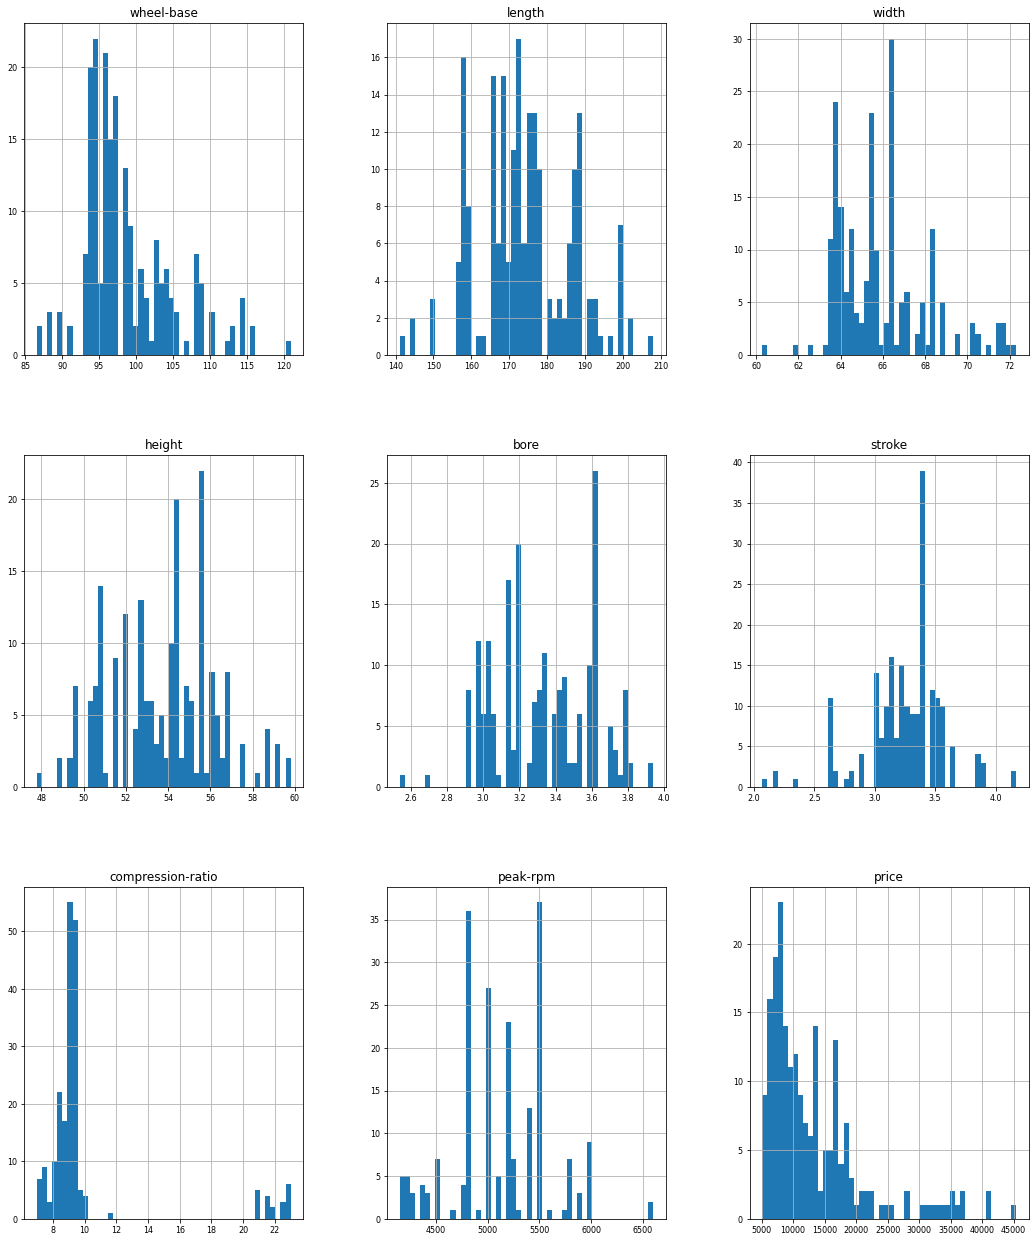

In [ ]:
histogram(dataset1)

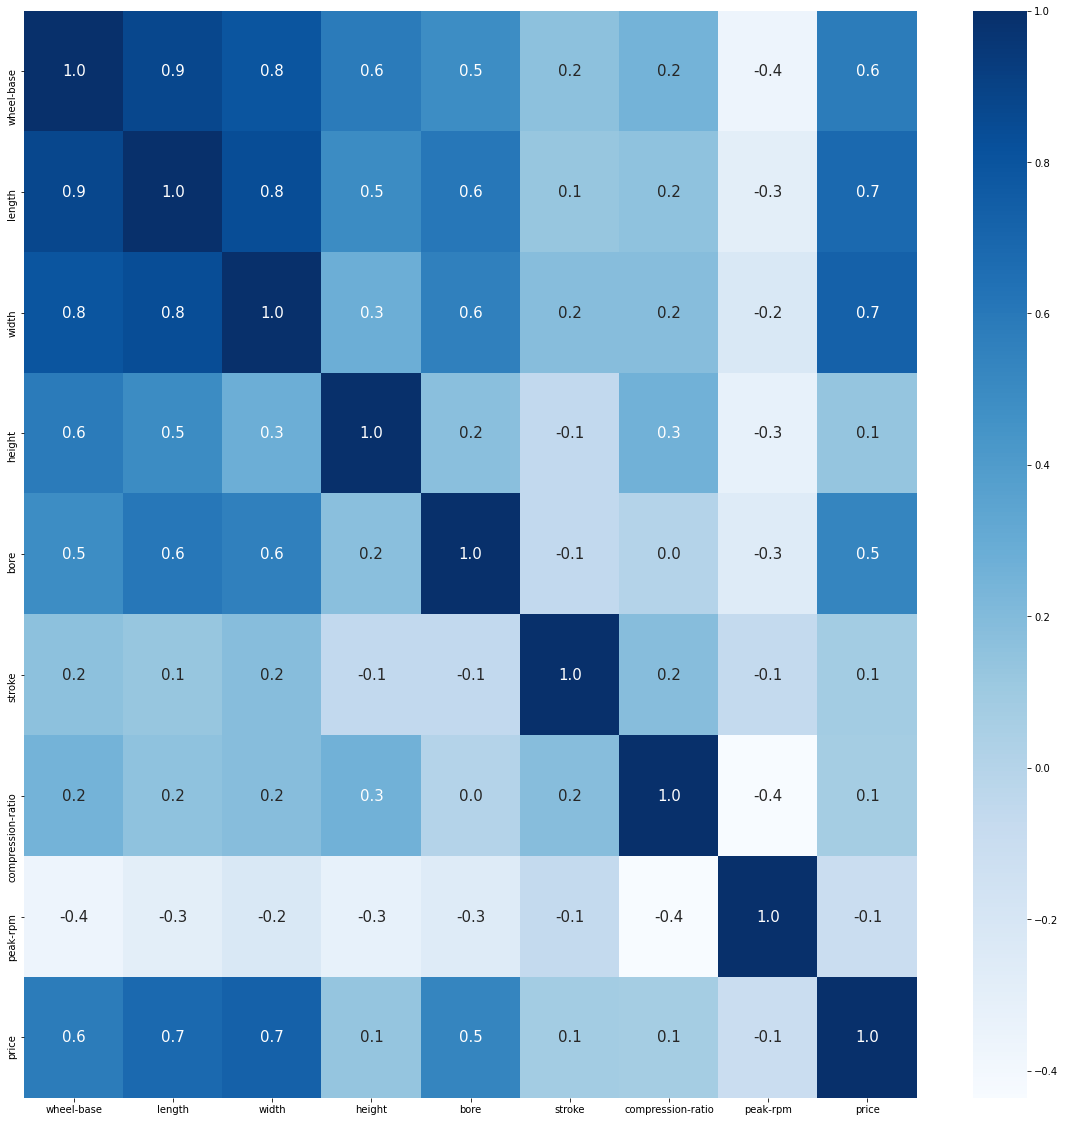

In [ ]:
heatmap(dataset1)

### Feature Engineering

In [ ]:
features1 = dataset1.drop(['price'], axis=1)
label1 = dataset1['price']

In [ ]:
# scalling dan memisahkan data train dan label
feature_train1, feature_test1, label_train1, label_test1 = scalling(features1, label1, 0.2)

### Linear Regression

In [ ]:
linreg(feature_train1, label_train1, feature_test1, label_test1)

MSE 		: 0.394
MAE 		: 0.458
r2 score 	: 0.448
RMSE 		: 0.628


### BaseLine Model

In [ ]:
jumlah_feature = 8

model_b1, history_b1 = bl_model(feature_train1, label_train1, feature_test1, 
                                label_test1, jumlah_feature)
history_b1

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 1.0658 - val_loss: 0.7030
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0378 - val_loss: 0.6813
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9964 - val_loss: 0.6447
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.9236 - val_loss: 0.5923
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.8357 - val_loss: 0.5275
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.7369 - val_loss: 0.4698
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6547 - val_loss: 0.4315
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5953 - val_loss: 0.4023
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5499 - val_loss: 0.3854
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5164 - val_loss: 0.3736
Epoch 11/50
21/21 [

In [ ]:
prediksi(feature_test1, label_test1, model_b1)

MSE 		: 0.353
MAE 		: 0.406
r2 score 	: 0.506
RMSE 		: 0.594


### Deeper Model

In [ ]:
model_d1, history_d1 = deeper_model(feature_train1, label_train1, feature_test1, 
                                    label_test1, jumlah_feature)
history_d1

Epoch 1/50
21/21 [==============================] - 0s 6ms/step - loss: 1.0711 - val_loss: 0.7146
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0678 - val_loss: 0.7106
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0563 - val_loss: 0.6968
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 1.0266 - val_loss: 0.6669
Epoch 5/50
21/21 [==============================] - 0s 3ms/step - loss: 0.9674 - val_loss: 0.6157
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.8770 - val_loss: 0.5404
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.7601 - val_loss: 0.4698
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6532 - val_loss: 0.4134
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5671 - val_loss: 0.3826
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5069 - val_loss: 0.3643
Epoch 11/50
21/21 [

In [ ]:
prediksi(feature_test1, label_test1, model_d1)

MSE 		: 0.461
MAE 		: 0.394
r2 score 	: 0.355
RMSE 		: 0.679


### Wider Model

In [ ]:
model_w1, history_w1 = wider_model(feature_train1, label_train1, feature_test1, 
                                   label_test1, jumlah_feature)
history_w1

Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0482 - val_loss: 0.6874
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.9981 - val_loss: 0.6490
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.9272 - val_loss: 0.5971
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8358 - val_loss: 0.5329
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7448 - val_loss: 0.4622
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6397 - val_loss: 0.4119
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5673 - val_loss: 0.3725
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5108 - val_loss: 0.3652
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4784 - val_loss: 0.3604
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4564 - val_loss: 0.3633
Epoch 11/

In [ ]:
prediksi(feature_test1, label_test1, model_w1)

MSE 		: 0.544
MAE 		: 0.443
r2 score 	: 0.239
RMSE 		: 0.737


# Dataset Auto MPG

In [ ]:
dataset2 = pd.read_csv('/content/drive/My Drive/abc/auto-mpg.csv')
dataset2 = dataset2.drop(['car name'], axis=1)
dataset2.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
0,8,307.0,130,3504,12.0,70,1,18.0
1,8,350.0,165,3693,11.5,70,1,15.0
2,8,318.0,150,3436,11.0,70,1,18.0
3,8,304.0,150,3433,12.0,70,1,16.0
4,8,302.0,140,3449,10.5,70,1,17.0


### EDA

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
dataset2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [ ]:
dataset2 = dataset2.replace('?', np.nan)

In [ ]:
dataset2.isnull().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
mpg             0
dtype: int64

In [ ]:
dataset2.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
82      1
132     1
138     1
66      1
94      1
Name: horsepower, Length: 93, dtype: int64

In [ ]:
dataset2['horsepower'].replace(np.nan, '150', inplace=True)

In [ ]:
dataset2['horsepower'] = dataset2['horsepower'].astype(int)

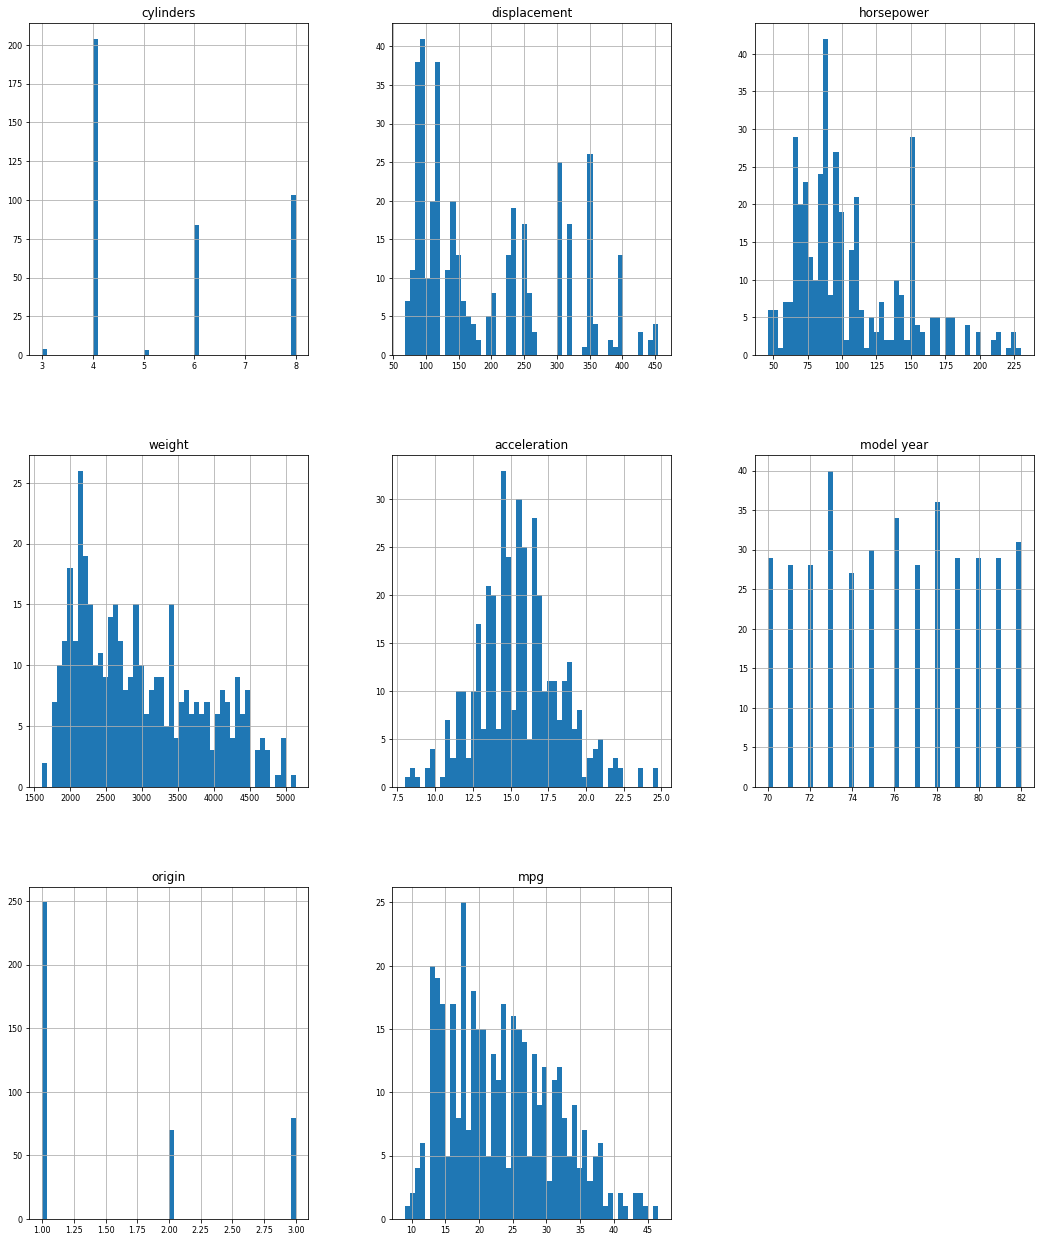

In [ ]:
histogram(dataset2)

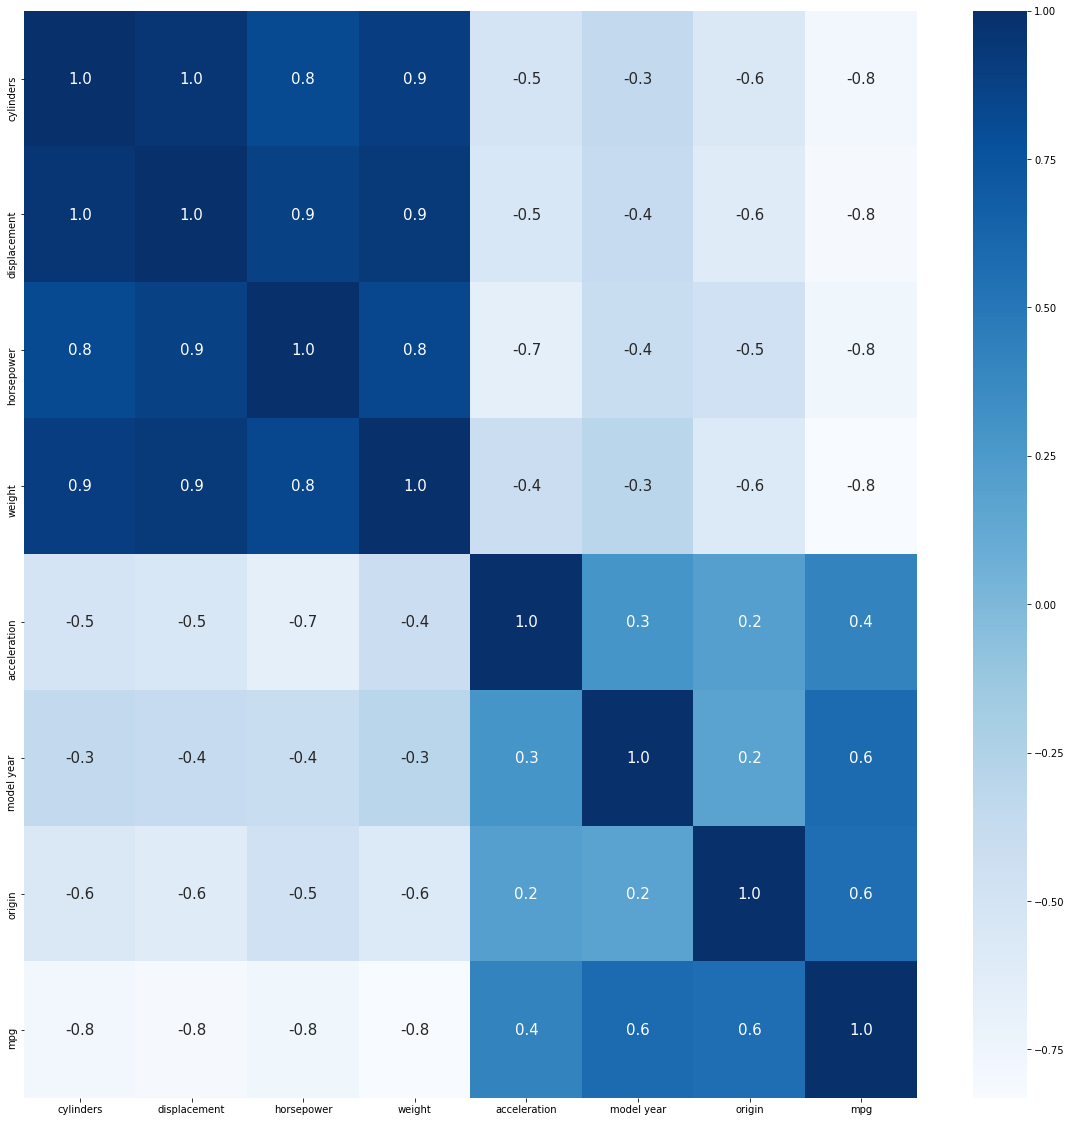

In [ ]:
heatmap(dataset2)

### Feature Engineering

In [ ]:
features2 = dataset2.drop(['mpg'], axis=1)
label2 = dataset2['mpg']

In [ ]:
# scalling dan memisahkan data train dan label
feature_train2, feature_test2, label_train2, label_test2 = scalling(features2, label2, 0.2)

### Linear Regression

In [ ]:
linreg(feature_train2, label_train2, feature_test2, label_test2)

MSE 		: 0.210
MAE 		: 0.369
r2 score 	: 0.791
RMSE 		: 0.458


### BaseLine Model

In [ ]:
jumlah_feature = 7

model_b2, history_b2 = bl_model(feature_train2, label_train2, feature_test2, 
                                label_test2, jumlah_feature)
history_b2

Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 0.9720 - val_loss: 0.9217
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.7827 - val_loss: 0.6567
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4796 - val_loss: 0.3839
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2741 - val_loss: 0.2776
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2151 - val_loss: 0.2516
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1964 - val_loss: 0.2351
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1831 - val_loss: 0.2239
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1721 - val_loss: 0.2160
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.1640 - val_loss: 0.2072
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.2021
Epoch 11/50
40/40 [

In [ ]:
prediksi(feature_test2, label_test2, model_b2)

MSE 		: 0.166
MAE 		: 0.305
r2 score 	: 0.834
RMSE 		: 0.408


### Deeper Model

In [ ]:
model_d2, history_d2 = deeper_model(feature_train2, label_train2, feature_test2, 
                                    label_test2, jumlah_feature)
history_d2

Epoch 1/50
40/40 [==============================] - 0s 4ms/step - loss: 0.9838 - val_loss: 0.9684
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.8866 - val_loss: 0.7835
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5945 - val_loss: 0.4309
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2782 - val_loss: 0.2568
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2064 - val_loss: 0.2403
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1918 - val_loss: 0.2261
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1805 - val_loss: 0.2157
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1715 - val_loss: 0.2073
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1655 - val_loss: 0.2008
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1576 - val_loss: 0.2009
Epoch 11/50
40/40 [

In [ ]:
prediksi(feature_test2, label_test2, model_d2)

MSE 		: 0.171
MAE 		: 0.310
r2 score 	: 0.829
RMSE 		: 0.414


### Wider Model

In [ ]:
model_w2, history_w2 = wider_model(feature_train2, label_train2, feature_test2, 
                                   label_test2, jumlah_feature)
history_w2

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.9135 - val_loss: 0.8283
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6726 - val_loss: 0.5255
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3790 - val_loss: 0.3125
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2499 - val_loss: 0.2681
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2156 - val_loss: 0.2491
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1945 - val_loss: 0.2307
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1793 - val_loss: 0.2184
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1644 - val_loss: 0.2049
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1544 - val_loss: 0.2019
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1457 - val_loss: 0.1946
Epoch 11/

In [ ]:
prediksi(feature_test2, label_test2, model_w2)

MSE 		: 0.159
MAE 		: 0.303
r2 score 	: 0.842
RMSE 		: 0.399


# Dataset Bottle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
zip_path = '/content/drive/My\ Drive/abc/bottle-updated.csv.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/bottle-updated.csv.zip -d /content

!rm /content/bottle-updated.csv.zip

In [12]:
dataset3 = pd.read_csv('bottle-updated.csv')
dataset3 = dataset3.drop(['Unnamed: 0'], axis=1)
dataset3.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


### EDA

In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  864863 non-null  int64  
 1   T_degC  853900 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [ ]:
dataset3.isnull().sum()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [ ]:
dataset3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


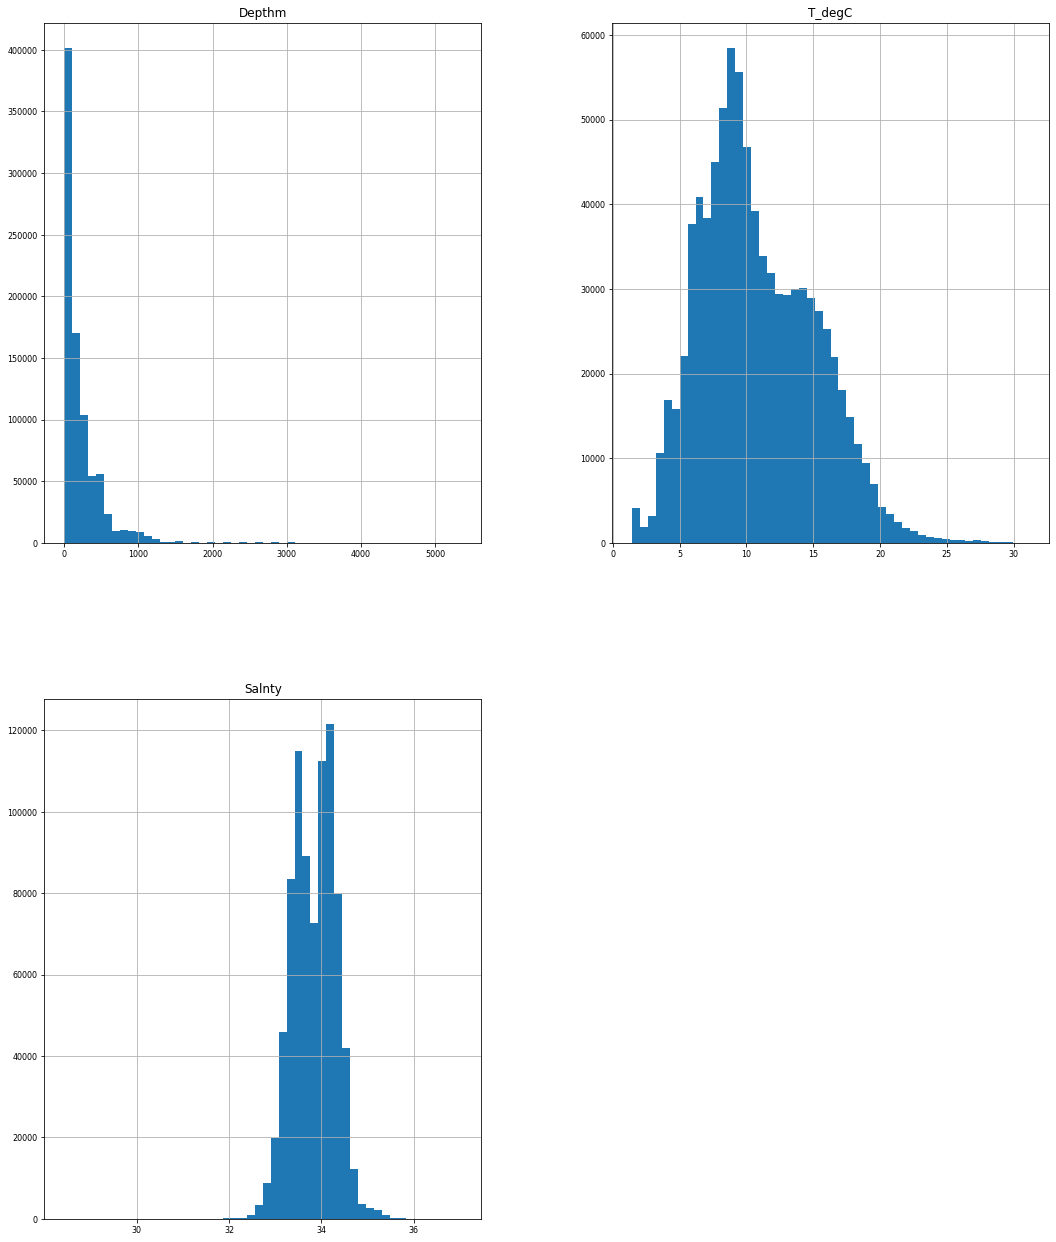

In [ ]:
histogram(dataset3)

In [ ]:
dataset3['T_degC'] = dataset3['T_degC'].fillna(dataset3['T_degC'].mean())

In [ ]:
dataset3.dropna(subset=['Salnty'], axis=0, inplace=True)

In [ ]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817509 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  817509 non-null  int64  
 1   T_degC  817509 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 24.9 MB


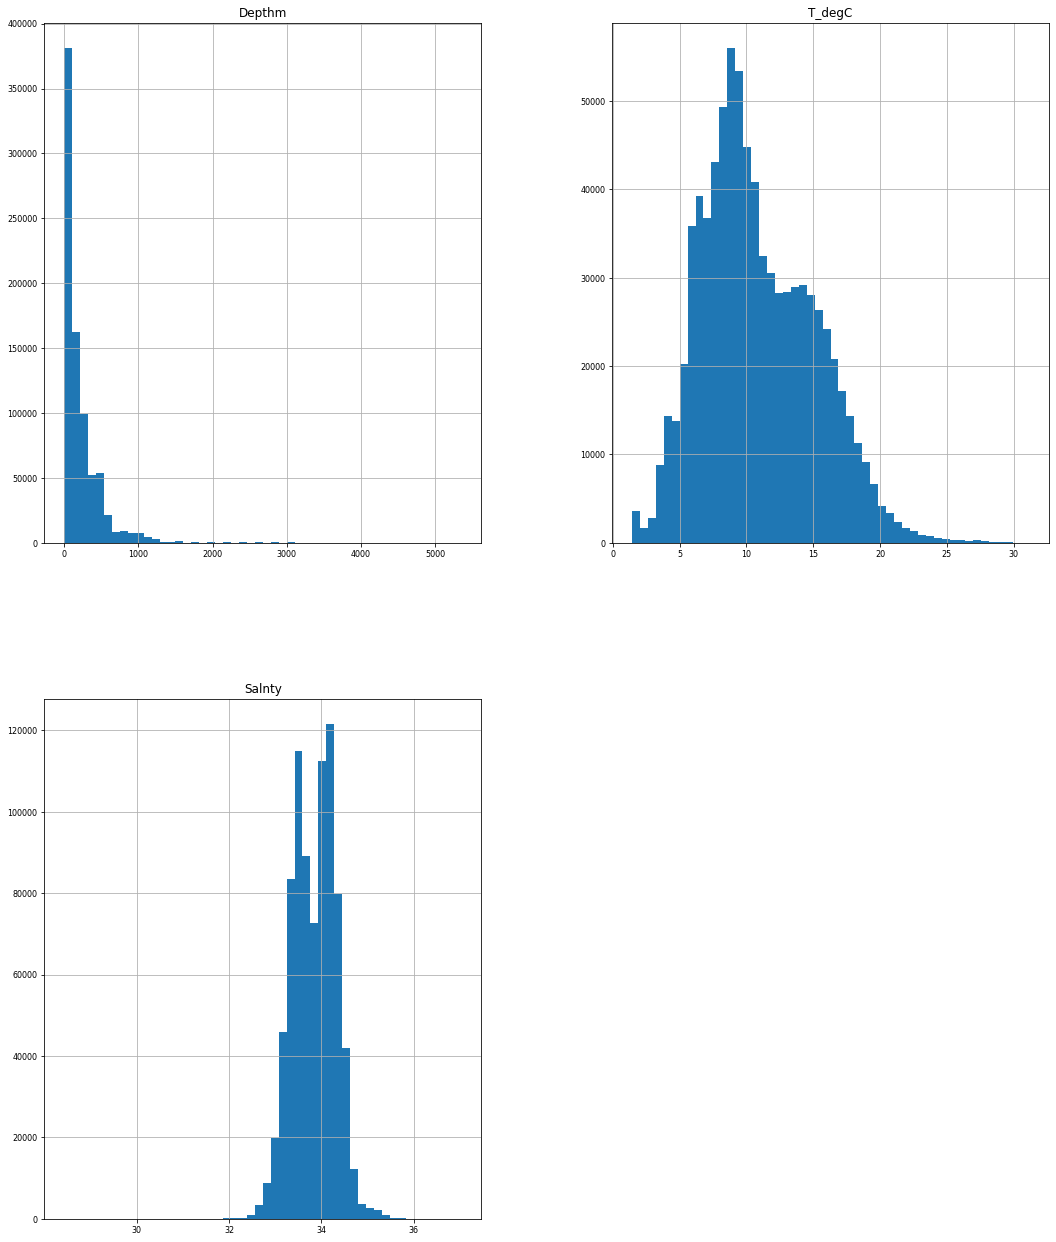

In [ ]:
histogram(dataset3)

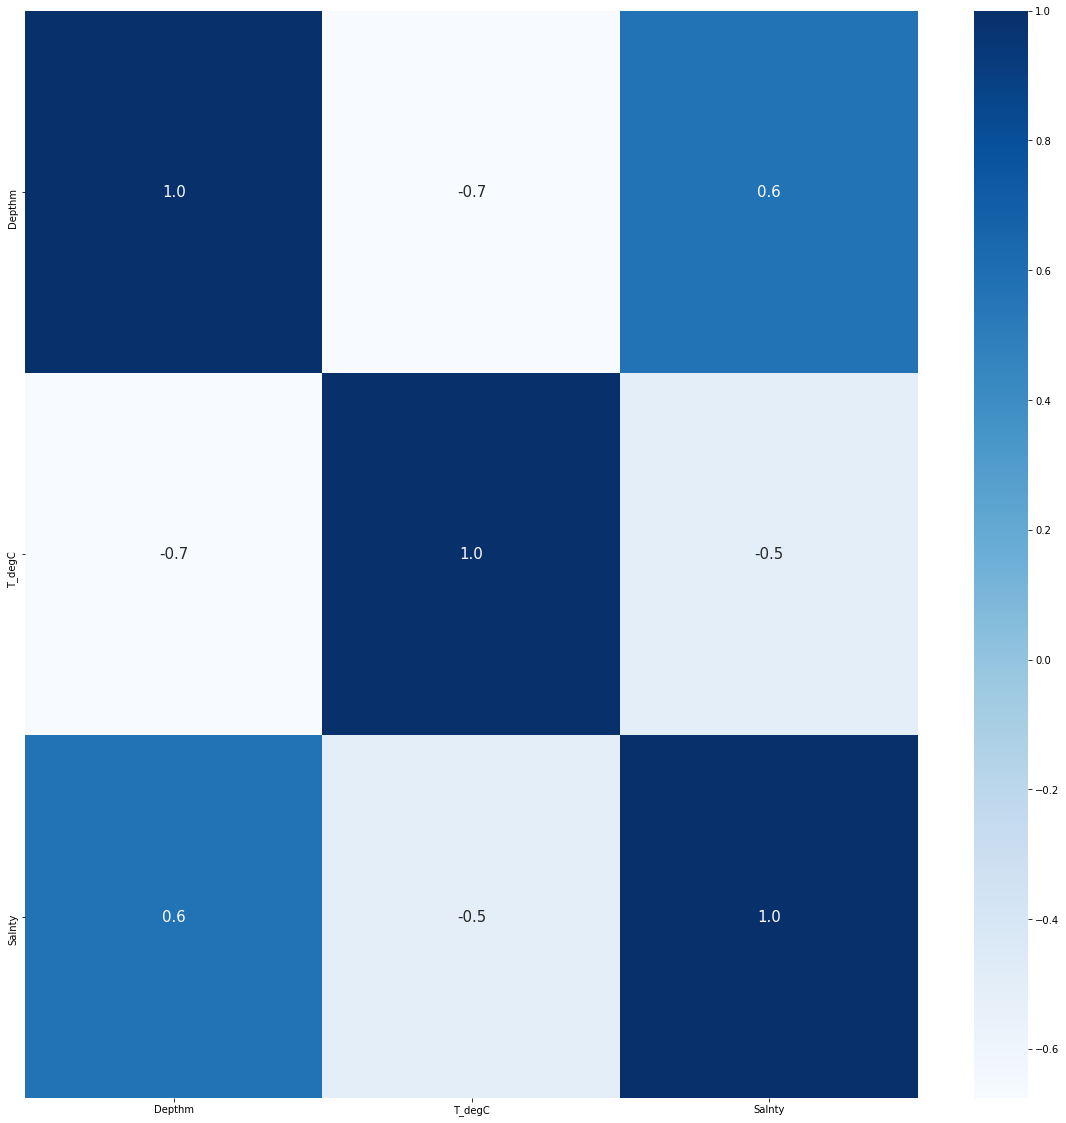

In [ ]:
heatmap(dataset3)

### Feature Engineering

In [13]:
features3 = dataset3.drop(['Salnty'], axis=1)
label3 = dataset3['Salnty']

In [14]:
# fungsi scalling
feature_train3, feature_test3, label_train3, label_test3 = scalling(features3, label3, 0.25)

### Linear Regression

In [ ]:
linreg(feature_train3, label_train3, feature_test3, label_test3)

MSE 		: 0.644
MAE 		: 0.560
r2 score 	: 0.354
RMSE 		: 0.802


### Baseline Model

In [ ]:
jumlah_feature = 2

model_b3, history_b3 = bl_model(feature_train3, label_train3, feature_test3, label_test3, jumlah_feature)
history_b3

Epoch 1/50
76642/76642 [==============================] - 146s 2ms/step - loss: 0.3530 - val_loss: 0.3348
Epoch 2/50
76642/76642 [==============================] - 146s 2ms/step - loss: 0.3397 - val_loss: 0.3344
Epoch 3/50
76642/76642 [==============================] - 146s 2ms/step - loss: 0.3391 - val_loss: 0.3325
Epoch 4/50
76642/76642 [==============================] - 146s 2ms/step - loss: 0.3386 - val_loss: 0.3301
Epoch 5/50
76642/76642 [==============================] - 145s 2ms/step - loss: 0.3372 - val_loss: 0.3262
Epoch 6/50
76642/76642 [==============================] - 145s 2ms/step - loss: 0.3190 - val_loss: 0.3198
Epoch 7/50
76642/76642 [==============================] - 144s 2ms/step - loss: 0.3123 - val_loss: 0.3066
Epoch 8/50
76642/76642 [==============================] - 145s 2ms/step - loss: 0.3116 - val_loss: 0.3045
Epoch 9/50
76642/76642 [==============================] - 145s 2ms/step - loss: 0.3114 - val_loss: 0.3055
Epoch 10/50
76642/76642 [=====================

In [ ]:
prediksi(feature_test3, label_test3, model_b3)

MSE 		: 0.310
MAE 		: 0.358
r2 score 	: 0.689
RMSE 		: 0.556


### Deeper Model

In [ ]:
jumlah_feature = 2
model_d3, history_d3 = deeper_model(feature_train3, label_train3, feature_test3, label_test3, jumlah_feature)
history_d3

Epoch 1/50
76642/76642 [==============================] - 210s 3ms/step - loss: 0.3142 - val_loss: 0.2982
Epoch 2/50
76642/76642 [==============================] - 185s 2ms/step - loss: 0.3033 - val_loss: 0.2977
Epoch 3/50
76642/76642 [==============================] - 209s 3ms/step - loss: 0.3021 - val_loss: 0.3004
Epoch 4/50
76642/76642 [==============================] - 203s 3ms/step - loss: 0.3014 - val_loss: 0.2962
Epoch 5/50
76642/76642 [==============================] - 196s 3ms/step - loss: 0.3010 - val_loss: 0.2975
Epoch 6/50
76642/76642 [==============================] - 186s 2ms/step - loss: 0.3006 - val_loss: 0.2964
Epoch 7/50
76642/76642 [==============================] - 193s 3ms/step - loss: 0.3004 - val_loss: 0.2985
Epoch 8/50
76642/76642 [==============================] - 187s 2ms/step - loss: 0.3002 - val_loss: 0.2991
Epoch 9/50
76642/76642 [==============================] - 183s 2ms/step - loss: 0.2999 - val_loss: 0.2969
Epoch 10/50
76642/76642 [=====================

In [ ]:
prediksi(feature_test3, label_test3, model_d3)

MSE 		: 0.294
MAE 		: 0.349
r2 score 	: 0.705
RMSE 		: 0.542


### Wider Model

In [ ]:
jumlah_feature = 2
model_w3, history_w3 = wider_model(feature_train3, label_train3, feature_test3, label_test3, jumlah_feature)
history_w3

In [ ]:
prediksi(feature_test3, label_test3, model_w3)

# Kesimpulan:
- **Auto** : hasil prediksi diperoleh linearregression (r2_score = 44%, mse = 0.39), baseline model (r2_score = 50%, mse = 0.35), deeper model (r2_score = 35%, mse = 0.46), dan wider model (r2_score = 23%, mse = 0.54). Pada kasus ini dengan paramter default, Prediksi terbaik yaitu baseline model.
- **Auto MPG** : hasil prediksi diperoleh linearregression (r2_score = 79%, mse = 0.21), baseline model (r2_score = 83%, mse = 0.16), deeper model (r2_score = 82%, mse = 0.17), dan wider model (r2_score = 84%, mse = 0.15). Pada kasus ini dengan paramter default, Prediksi terbaik yaitu wider model.
- **Bottle** : hasil prediksi diperoleh linearregression (r2_score = 35%, mse = 0.64), baseline model (r2_score = 68%, mse = 0.31), deeper model (r2_score = 70%, mse = 0.29), dan wider model (r2_score = 71%, mse = 0.28). Pada kasus ini dengan paramter default, Prediksi terbaik yaitu wider model. Model deeplearning prediksinya lebih bagus dibanding model ML linear regression.
- Secara keseluruhan hasil prediksi model tergantung terhadap data, ada pada suatu kasus hasil prdiksi deep learning lebih bagus dibandingkan ML sederhana dan begitu pun sebaliknya.